This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-MEDIUM-ITFW'
#MESH = 'TRI03-INTERMEDIATE-ITFW'
#MESH = 'TRI03-FINE-ITFW'
#MESH = 'TRI03-SUPERFINE-ITFW'
#MESH = 'TRI03-MEGAFINE-ITFW'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-MEDIUM-ITFW'
#MESH = 'TRI06-INTERMEDIATE-ITFW'
#MESH = 'TRI06-FINE-ITFW'
MESH = 'TRI06-SUPERFINE-ITFW'
#MESH = 'TRI06-MEGAFINE-ITFW'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-SUPERFINE-ITFW'


###### LINEAR QUADRILATERAL ELEMENT MESH
#MESH = 'QUA04-MEDIUM-ITFW'
#MESH = 'QUA04-INTERMEDIATE-ITFW'
#MESH = 'QUA04-FINE-ITFW'
#MESH = 'QUA04-SUPERFINE-ITFW'
#MESH = 'QUA04-MEGAFINE-ITFW'

###### QUADRATIC QUADRILATERAL ELEMENT MESH
#MESH = 'QUA09-MEDIUM-ITFW'
#MESH = 'QUA09-INTERMEDIATE-ITFW'
#MESH = 'QUA09-FINE-ITFW'
#MESH = 'QUA09-SUPERFINE-ITFW'
#MESH = 'QUA09-MEGAFINE-ITFW'

# RECTANGULAR MESH
#MESH = 'TRI03-FINE-RECTANGLE'
#MESH = 'TRI06-MEDIUM-RECTANGLE'

#MESH = 'TRI10-MEGAFINE-LINEAR'

Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



In [2]:
##CREATE GRAD-SHAFRANOV PROBLEM WITH CHOSEN MESH
Problem = GradShafranovSolver(MESH)

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
READ MESH FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
Done!


In [3]:
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Problem.FIXED_BOUNDARY = False
Problem.GhostStabilization = True
Problem.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Problem.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Problem.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Problem.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Problem.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Problem.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

In [4]:
# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Problem.QuadratureOrder2D = 8   # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Problem.EXT_ITER = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Problem.EXT_TOL = 1.0e-3        # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Problem.INT_ITER = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Problem.INT_TOL = 1.0e-4        # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Problem.PLASMA_IT = 0           # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Problem.beta = 1.0e6            # NITSCHE'S METHOD PENALTY PARAMETER
Problem.zeta = 1.0e-2           # GHOST PENALTY PARAMETER
Problem.PSIrelax = False
Problem.lambda0 = 0.3          # INITIAL AIKITEN'S RELAXATION PARAMETER
Problem.PHIrelax = False
Problem.alphaPHI = 0.5
Problem.EXTR_R0 = 6.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.EXTR_Z0 = 1.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.SADD_R0 = 5.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.SADD_Z0 = -3.5          # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.OPTI_ITMAX = 50         # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Problem.OPTI_TOL = 1.0e-6       # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

In [5]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(index = 1,
             dim = Problem.dim,
             X = np.array([3.9431,7.5741]),
             I = 5.73e6)
coil2 = Coil(index = 2,
             dim = Problem.dim,
             X = np.array([8.2851,6.5398]),
             I = -2.88e6)
coil3 = Coil(index = 3,
             dim = Problem.dim,
             X = np.array([11.9919,3.2752]),
             I = -5.81e6)
coil4 = Coil(index = 4,
             dim = Problem.dim,
             X = np.array([11.9630,-2.2336]),
             I = -4.78e6)
coil5 = Coil(index = 5,
             dim = Problem.dim,
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e6)
coil6 = Coil(index = 6,
             dim = Problem.dim,
             X = np.array([4.3340, -7.4665]),
             I = 16.94e6)
Problem.COILS = [coil1, coil2, coil3, coil4, coil5, coil6]
   
# SOLENOIDS
solenoid1 = Solenoid(index = 1,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -5.415],
                                    [1.696, -3.6067]]),
                     I = 5.3e6,
                     Nturns = 1)
solenoid2 = Solenoid(index = 2,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -3.6067],
                                    [1.696, -1.7983]]),
                     I = -10.3e6,
                     Nturns = 1)
solenoid3 = Solenoid(index = 3,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -1.7983],
                                    [1.696, 0.0]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid4 = Solenoid(index = 4,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 0.0],
                                    [1.696, 1.8183]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid5 = Solenoid(index = 5,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 1.8183],
                                    [1.696, 3.6267]]),
                     I = -4.05e6,
                     Nturns = 1)
solenoid6 = Solenoid(index = 6,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 3.6267],
                                    [1.696, 5.435]]),
                     I = -4.82e6,
                     Nturns = 1)
Problem.SOLENOIDS = [solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

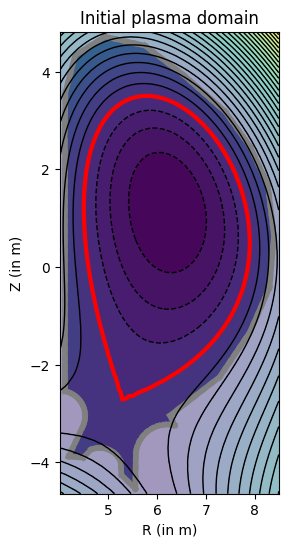

In [6]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""
"""
X_SADDLE = np.array([5.3, -2.6])
X_RIGHT = np.array([7.8, 0.5])
X_LEFT = np.array([4.8, 1.2])
X_TOP = np.array([6.0, 3.5])
"""
X_SADDLE = np.array([5.3, -2.7])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.5])

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Problem.initialPHI.Plot()

In [7]:
Problem.InitialiseMESH()

PREPROCESS MESH AND INITIALISE MESH ITEMS...
     -> INITIALISE SIMULATION PARAMETERS...Done!
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017036638942055492 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1968502217357368 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·20.320017751211036
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
Done!


In [8]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""
"""
X_SADDLE = np.array([5.3, -2.6])
X_RIGHT = np.array([7.8, 0.5])
X_LEFT = np.array([4.8, 1.2])
X_TOP = np.array([6.0, 3.5])
"""

X_SADDLE = np.array([5.3, -2.7])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.5])

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     
"""
def PSI0(X):
    return
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

"\ndef PSI0(X):\n    return\nProblem.initialPSI = InitialGuess(PROBLEM = Problem,\n                                  PSI_GUESS = 'OTHER',\n                                  PSI0 = PSI0)\n"

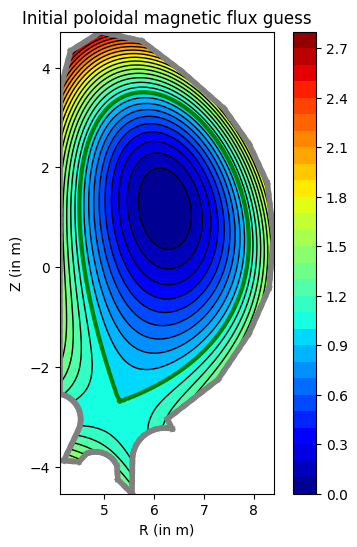

In [9]:
Problem.initialPSI.Plot()

In [10]:
Problem.InitialisePSI()

     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!


In [11]:
### DEFINE PLASMA CURRENT MODEL

# LINEAR MODEL
"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# ZHENG MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'ZHENG',   # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# NONLINEAR MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'NONLINEAR', # PREDEFINED MODEL
                                     R0 = 6.0)            # MEAN RADIUS
"""


# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Problem.mu0*(R0**2)*q0*kappa)

"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.2,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

"\n# USER DEFINED MODEL\ndef Jphi(X,PSI):\n    return 6*X[0]\nProblem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,\n                                     MODEL = 'OTHER',\n                                     Jphi = Jphi,\n                                     PSIdependent = False)\n"

In [12]:
Problem.IntegratePlasmaDomain(Problem.PlasmaCurrent.Jphi)

15000000.000000045

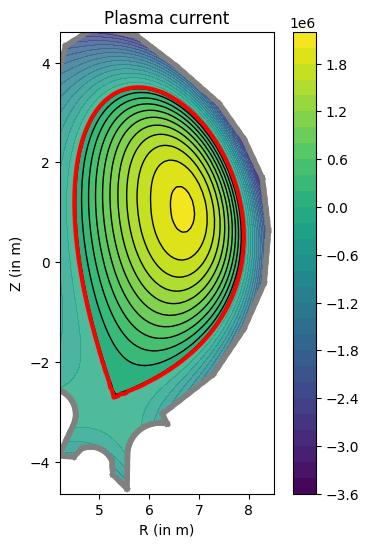

In [13]:
Problem.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE SIMULATION ARRAYS ...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
     -> ASSIGN INITIAL BOUNDARY VALUES...Done!
Done!


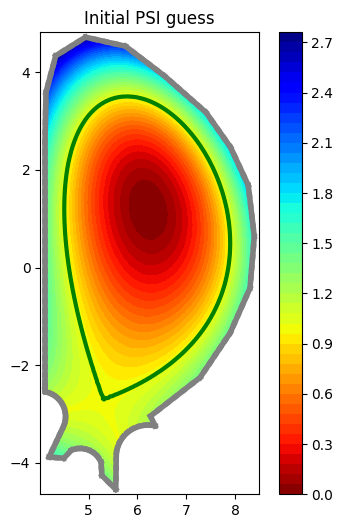

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  15000000.000000045
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.4091786 , 0.80452814]), -10.605539928915114, 1097)]
Xpoint =  [(array([ 4.97234746, -3.10042749]), 0.6369901833391303, 185)]
LOCAL EXTREMUM AT  [6.4091786  0.80452814]  (ELEMENT  1097 ) WITH VALUE PSI_0 =  -10.605539928915114
SADDLE POINT AT  [ 4.97234746 -3.10042749]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6369901833391303


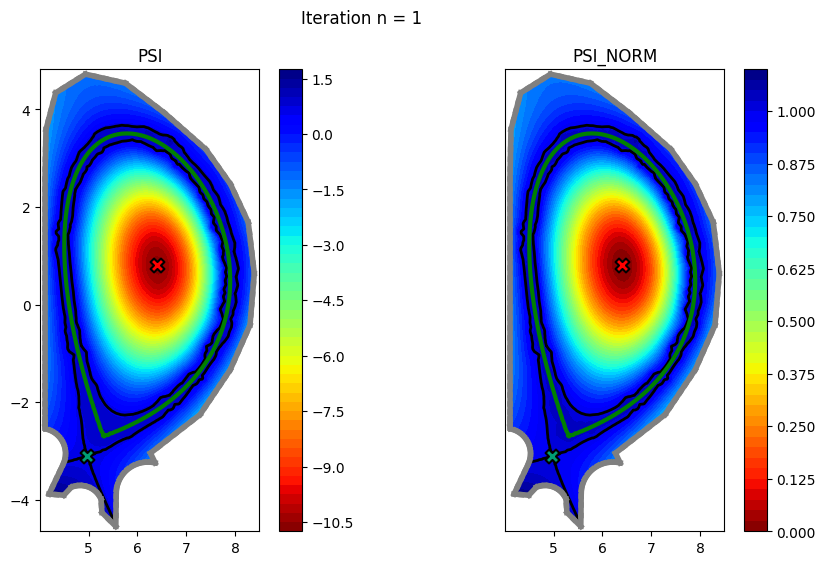

Internal iteration =  1 , PSI_NORM residu =  0.4862182003282043
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  15000000.000000013
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.44807928, 0.82682722]), -12.848164787435156, 1097)]
Xpoint =  [(array([ 5.06688522, -3.11966842]), 0.6377202204374198, 185)]
LOCAL EXTREMUM AT  [6.44807928 0.82682722]  (ELEMENT  1097 ) WITH VALUE PSI_0 =  -12.848164787435156
SADDLE POINT AT  [ 5.06688522 -3.11966842]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6377202204374198


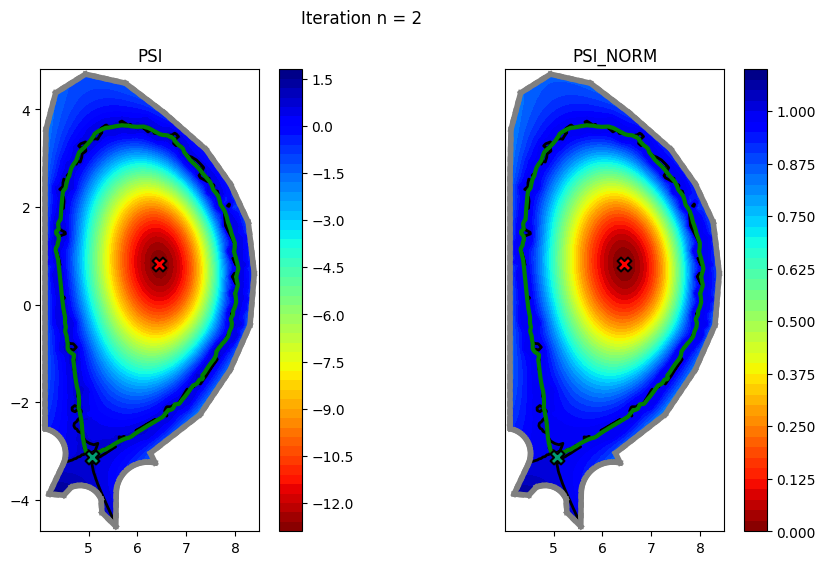

Internal iteration =  2 , PSI_NORM residu =  0.07870418436657314
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  15000000.000000076
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.48249292, 0.70343846]), -14.432990730186257, 1099)]
Xpoint =  [(array([ 5.06728044, -3.11984939]), 0.6384234981441885, 185)]
LOCAL EXTREMUM AT  [6.48249292 0.70343846]  (ELEMENT  1099 ) WITH VALUE PSI_0 =  -14.432990730186257
SADDLE POINT AT  [ 5.06728044 -3.11984939]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6384234981441885


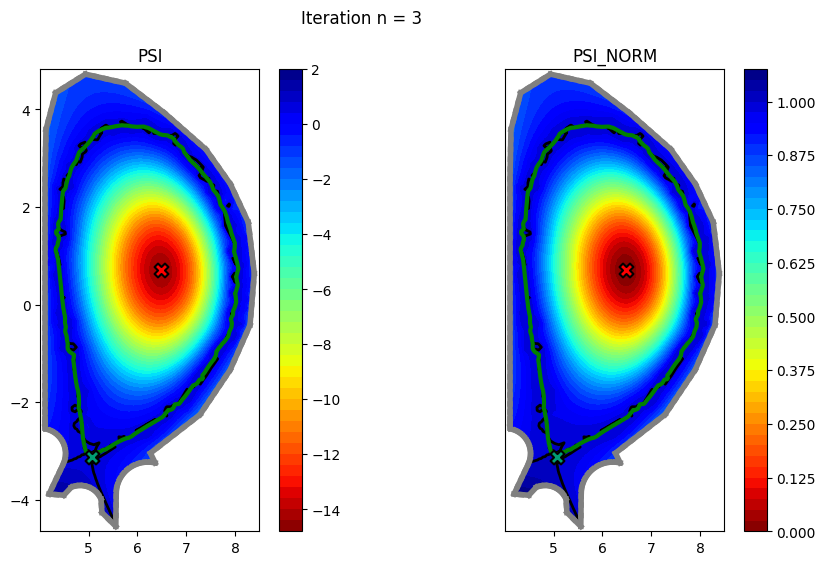

Internal iteration =  3 , PSI_NORM residu =  0.032044057835615106
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  14999999.999999963
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.50818802, 0.71205218]), -12.67311865244163, 1099)]
Xpoint =  [(array([ 5.06515124, -3.12024418]), 0.6392344849995424, 185)]
LOCAL EXTREMUM AT  [6.50818802 0.71205218]  (ELEMENT  1099 ) WITH VALUE PSI_0 =  -12.67311865244163
SADDLE POINT AT  [ 5.06515124 -3.12024418]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6392344849995424


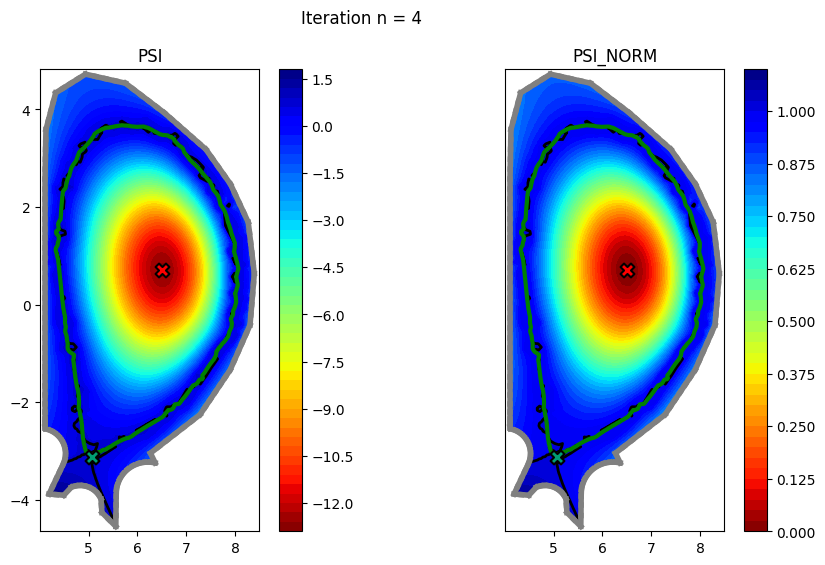

Internal iteration =  4 , PSI_NORM residu =  0.017299812745681733
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.00000004
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51847659, 0.66080933]), -13.030652407429336, 1099)]
Xpoint =  [(array([ 5.06446568, -3.1205585 ]), 0.6400689679734903, 185)]
LOCAL EXTREMUM AT  [6.51847659 0.66080933]  (ELEMENT  1099 ) WITH VALUE PSI_0 =  -13.030652407429336
SADDLE POINT AT  [ 5.06446568 -3.1205585 ]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6400689679734903


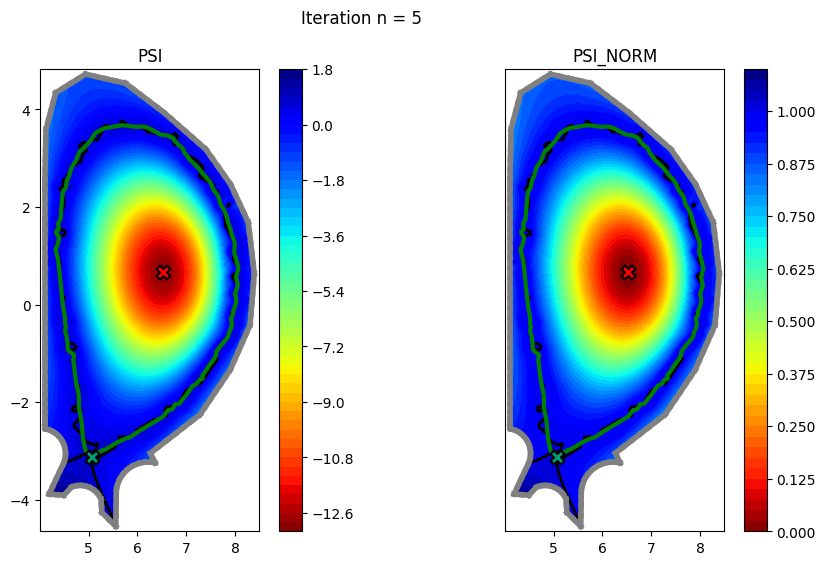

Internal iteration =  5 , PSI_NORM residu =  0.011426655781842342
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  14999999.999999935
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52696431, 0.66376987]), -12.785789466667618, 1099)]
Xpoint =  [(array([ 5.06360837, -3.12090084]), 0.6409323915446994, 185)]
LOCAL EXTREMUM AT  [6.52696431 0.66376987]  (ELEMENT  1099 ) WITH VALUE PSI_0 =  -12.785789466667618
SADDLE POINT AT  [ 5.06360837 -3.12090084]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6409323915446994


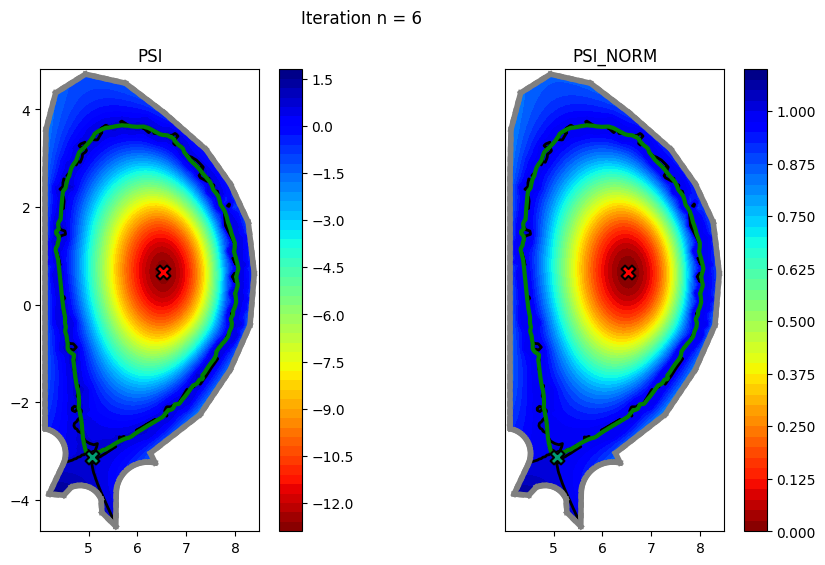

Internal iteration =  6 , PSI_NORM residu =  0.003870296180369878
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  15000000.000000078
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53068105, 0.64060238]), -12.876170857719327, 1560)]
Xpoint =  [(array([ 5.06283506, -3.12124113]), 0.6418158216171548, 185)]
LOCAL EXTREMUM AT  [6.53068105 0.64060238]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.876170857719327
SADDLE POINT AT  [ 5.06283506 -3.12124113]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6418158216171548


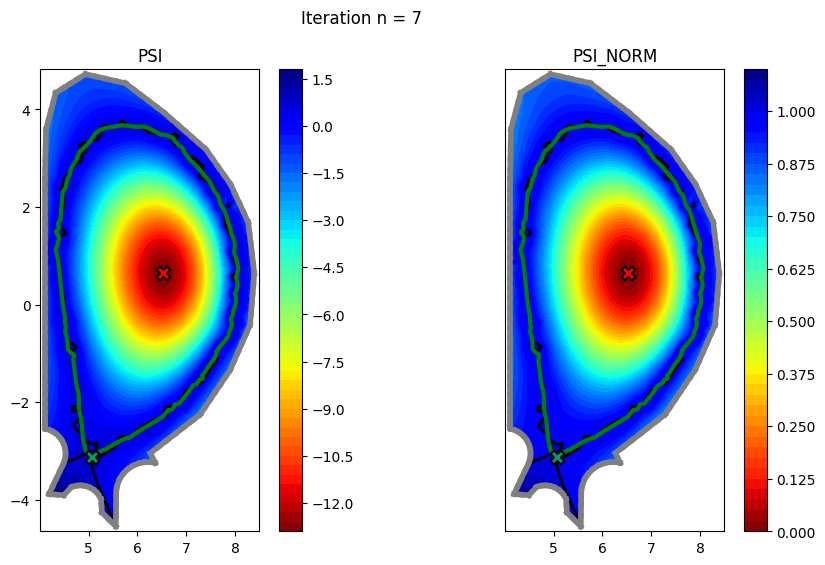

Internal iteration =  7 , PSI_NORM residu =  0.004634406677892605
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  15000000.00000005
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53294549, 0.64163539]), -12.824737409226987, 1560)]
Xpoint =  [(array([ 5.06206124, -3.12158748]), 0.6427150184994748, 185)]
LOCAL EXTREMUM AT  [6.53294549 0.64163539]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.824737409226987
SADDLE POINT AT  [ 5.06206124 -3.12158748]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6427150184994748


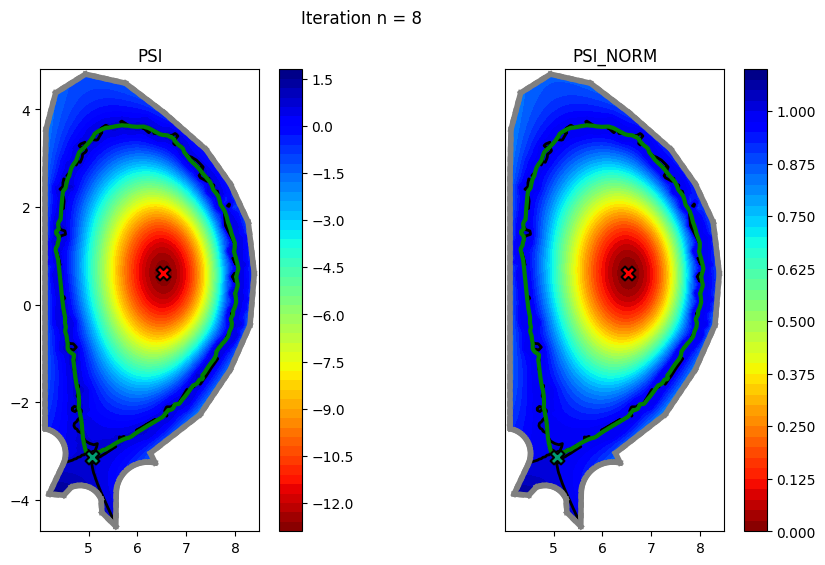

Internal iteration =  8 , PSI_NORM residu =  0.000966422257210232
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  14999999.999999885
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53435576, 0.63097157]), -12.849357863832381, 1560)]
Xpoint =  [(array([ 5.06126772, -3.12194093]), 0.6436265662225125, 185)]
LOCAL EXTREMUM AT  [6.53435576 0.63097157]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.849357863832381
SADDLE POINT AT  [ 5.06126772 -3.12194093]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6436265662225125


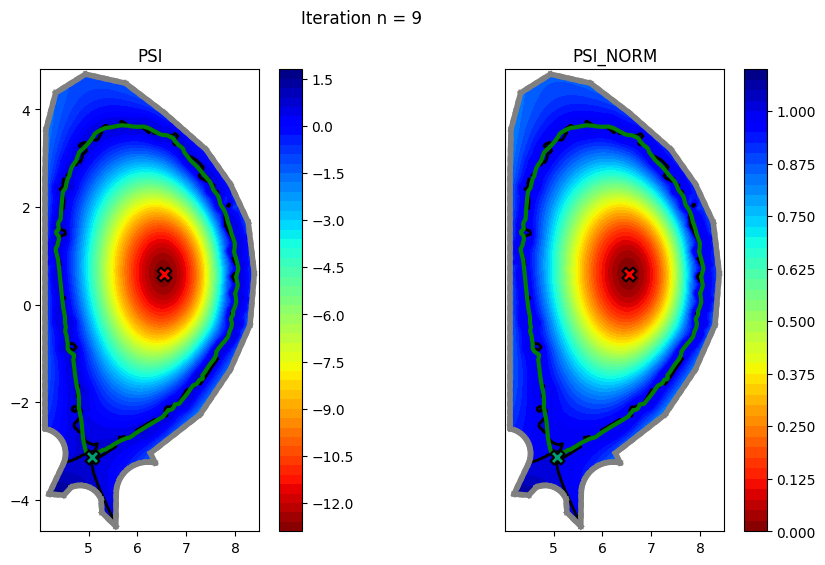

Internal iteration =  9 , PSI_NORM residu =  0.002018861377943274
 
OUTER ITERATION = 1 , INNER ITERATION = 10
     Total current =  14999999.999999994
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53491696, 0.63135493]), -12.836455229545647, 1560)]
Xpoint =  [(array([ 5.06048814, -3.12229728]), 0.644545447066465, 185)]
LOCAL EXTREMUM AT  [6.53491696 0.63135493]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.836455229545647
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


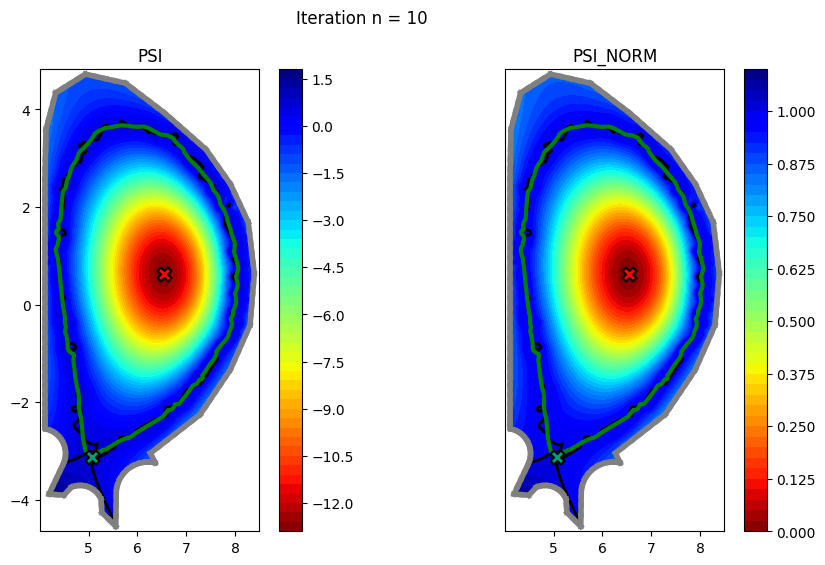

Internal iteration =  10 , PSI_NORM residu =  0.00026006409093282703
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  1 , PSI_B residu =  0.7212401543042143
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  15000000.00000018
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53613311, 0.62480993]), -12.84574999417469, 1461)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.53613311 0.62480993]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.84574999417469
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


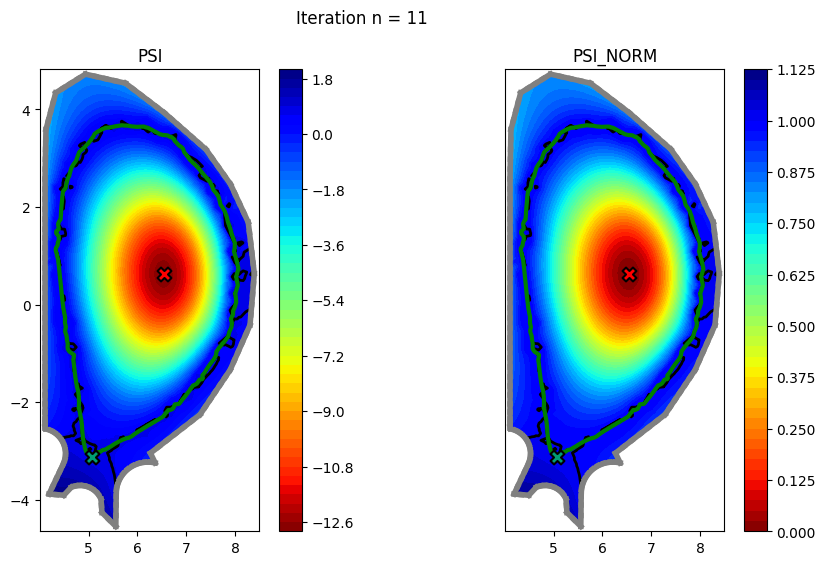

Internal iteration =  1 , PSI_NORM residu =  0.033765687289387405
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  14999999.999999922
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.536267 , 0.6249604]), -12.842693000740725, 1461)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.536267  0.6249604]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.842693000740725
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


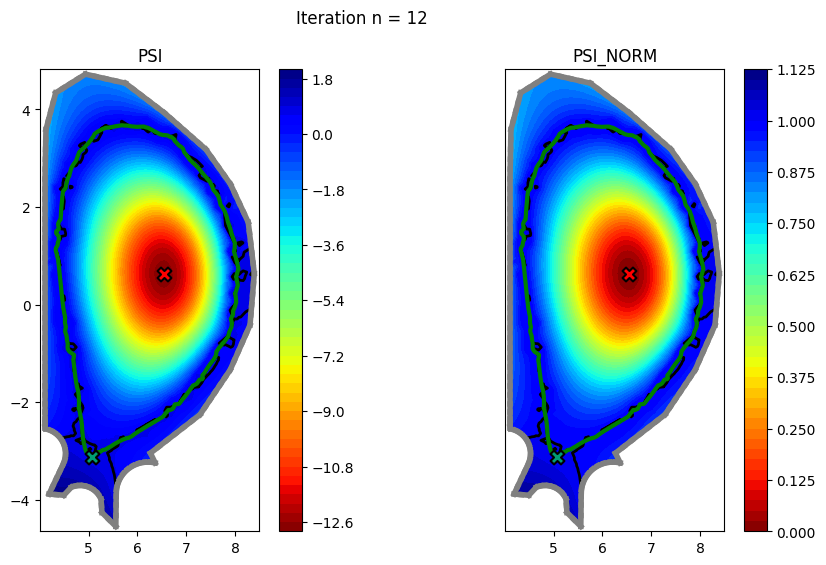

Internal iteration =  2 , PSI_NORM residu =  6.811113778664478e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  2 , PSI_B residu =  0.011353398407719975
 
OUTER ITERATION = 3 , INNER ITERATION = 1
     Total current =  15000000.000000117
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53683694, 0.62158216]), -12.845941485813803, 1461)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.53683694 0.62158216]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.845941485813803
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


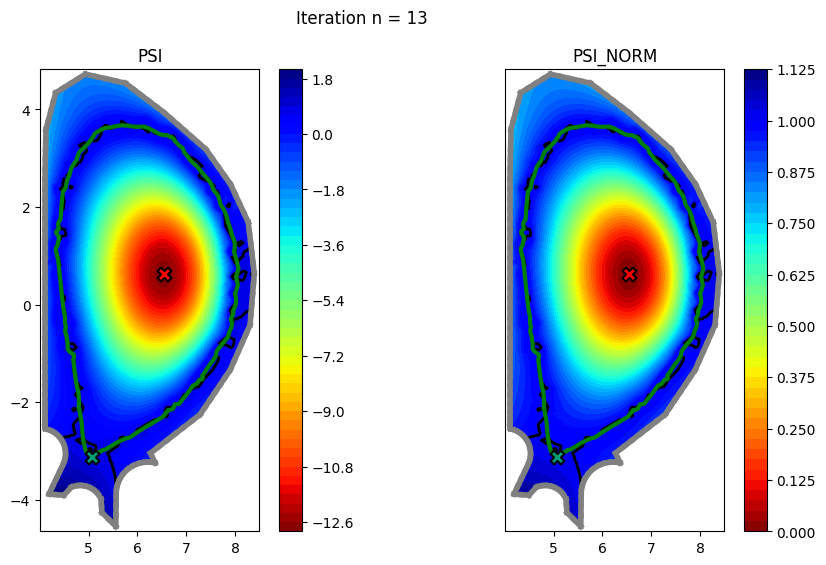

Internal iteration =  1 , PSI_NORM residu =  0.0008142254058001674
 
OUTER ITERATION = 3 , INNER ITERATION = 2
     Total current =  15000000.00000005
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53686758, 0.62164481]), -12.845128378892792, 1461)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.53686758 0.62164481]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.845128378892792
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


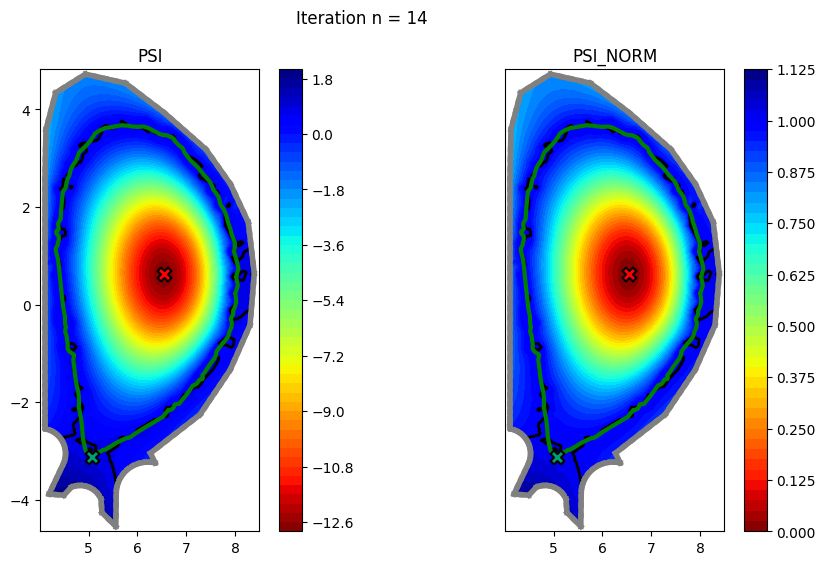

Internal iteration =  2 , PSI_NORM residu =  2.0022844228027776e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  3 , PSI_B residu =  0.004281728115206368
 
OUTER ITERATION = 4 , INNER ITERATION = 1
     Total current =  15000000.000000058
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53708477, 0.6200431 ]), -12.846077648479195, 1461)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.53708477 0.6200431 ]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.846077648479195
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


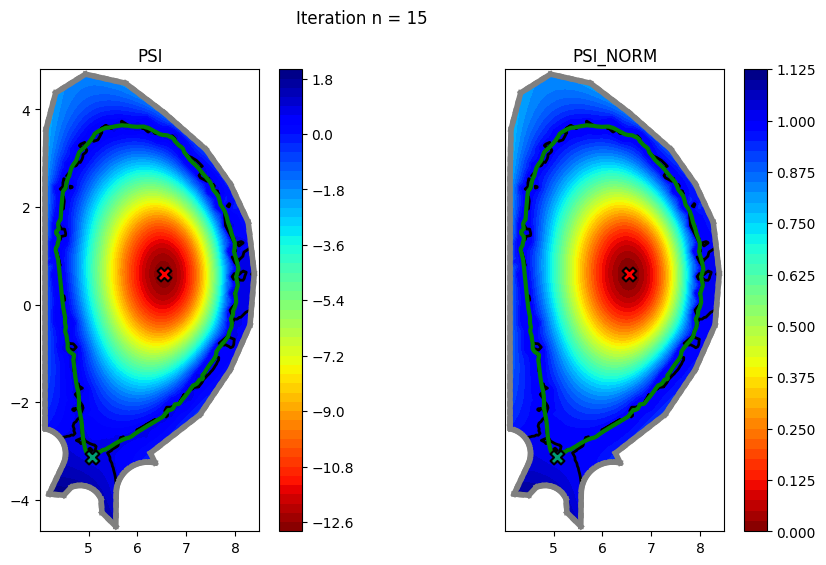

Internal iteration =  1 , PSI_NORM residu =  0.00035236261780856716
 
OUTER ITERATION = 4 , INNER ITERATION = 2
     Total current =  14999999.999999959
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.5370913 , 0.62007032]), -12.84585495202284, 1461)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.5370913  0.62007032]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.84585495202284
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


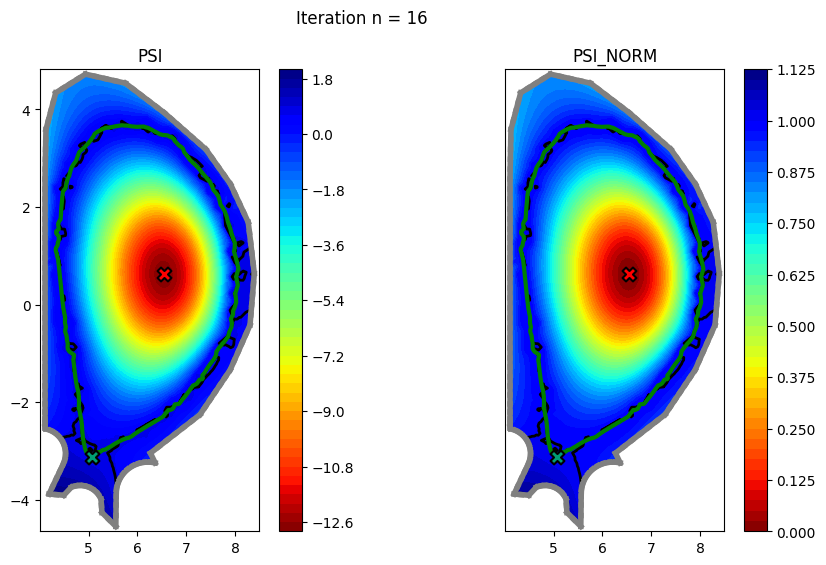

Internal iteration =  2 , PSI_NORM residu =  6.58287200672463e-06
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  4 , PSI_B residu =  0.00193333340562052
 
OUTER ITERATION = 5 , INNER ITERATION = 1
     Total current =  15000000.000000063
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53717078, 0.61932611]), -12.846175742455006, 1461)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.53717078 0.61932611]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.846175742455006
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


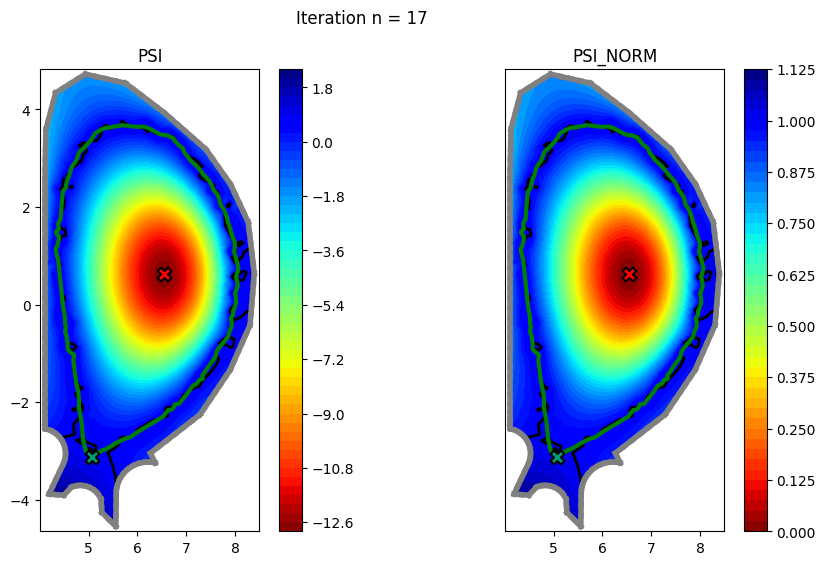

Internal iteration =  1 , PSI_NORM residu =  0.0001627717132802503
 
OUTER ITERATION = 5 , INNER ITERATION = 2
     Total current =  14999999.999999966
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53717196, 0.61933828]), -12.846113643769586, 1461)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.53717196 0.61933828]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.846113643769586
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.06048814 -3.12229728]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.644545447066465


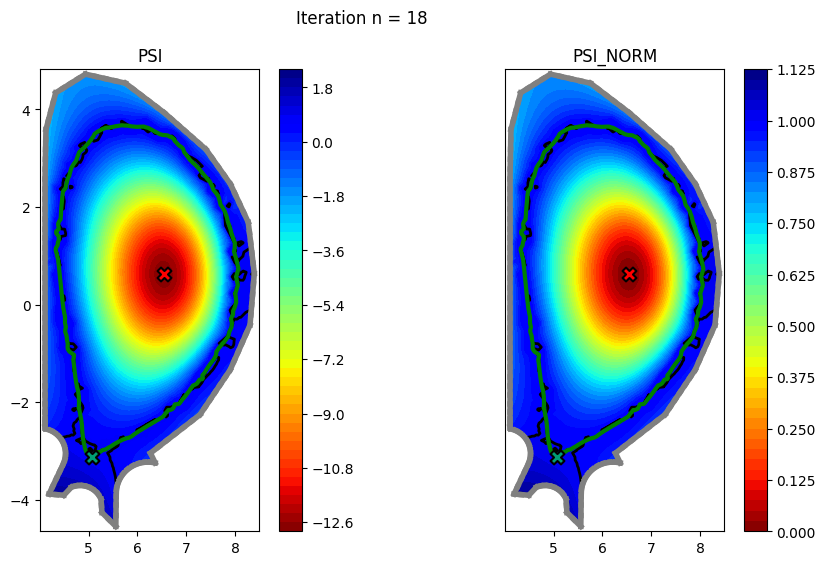

Internal iteration =  2 , PSI_NORM residu =  2.4760411887672264e-06
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  5 , PSI_B residu =  0.0008957656656846733
 
SOLUTION CONVERGED


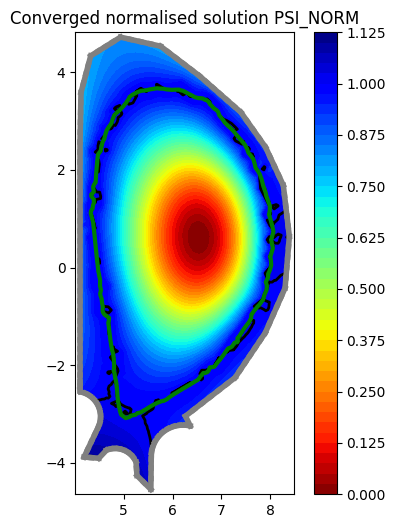

In [14]:
## NAME SIMULATION CASE 
CASE = 'TS-FREE-APEC-ITFW'

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI(CASE)

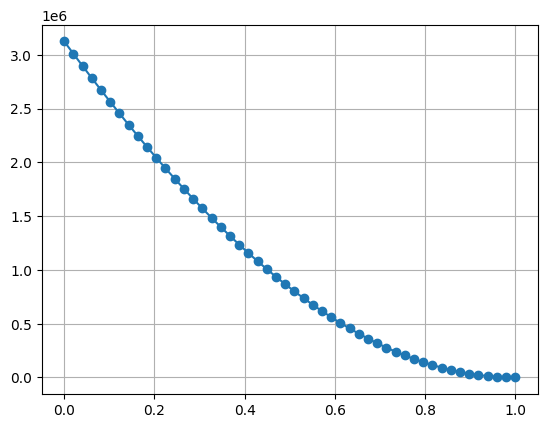

In [15]:
import numpy as np
from scipy.integrate import quad

self = Problem

def P(psinorm):
    shapeintegral, _ = quad(
        func = lambda x: (1.0 - x**self.PlasmaCurrent.alpha),
        a = psinorm, 
        b = 1.0)
    return (self.PlasmaCurrent.L*self.PlasmaCurrent.Beta/self.PlasmaCurrent.R0)*(self.PSI_X - self.PSI_0)*shapeintegral 

n = 50
psi_norm = np.linspace(0,1,n)
Pprofile = np.zeros([n])
for i, psi in enumerate(psi_norm):
    Pprofile[i] = P(psi)
    
plt.plot(psi_norm,Pprofile,'-o')
plt.grid()

In [16]:
print(self.PSI_X - self.PSI_0)
print((self.PSI_X - self.PSI_0) /2.7)

13.49065909083605
4.996540404013352


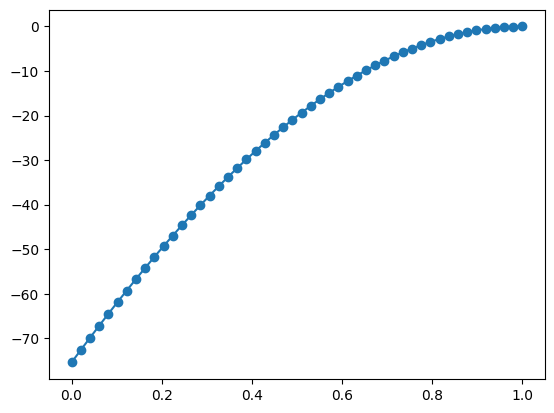

In [23]:
def F(psinorm):
    shapeintegral, _ = quad(
        func = lambda x: (1.0 - x**self.PlasmaCurrent.alpha),
        a = psinorm, 
        b = 1.0)
    return 2*self.mu0*self.PlasmaCurrent.L*(1-self.PlasmaCurrent.Beta)*(self.PSI_X - self.PSI_0)*self.PlasmaCurrent.R0*shapeintegral

Fprofile = np.zeros([n])
for i, psi in enumerate(psi_norm):
    Fprofile[i] = F(psi)
    
plt.plot(psi_norm,Fprofile,'-o')


In [18]:
from scipy.integrate import solve_ivp



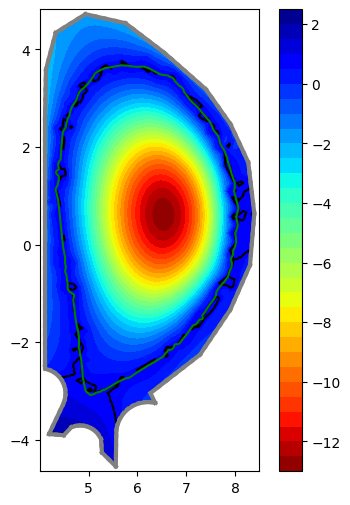

In [19]:
Problem.PlotPSI()

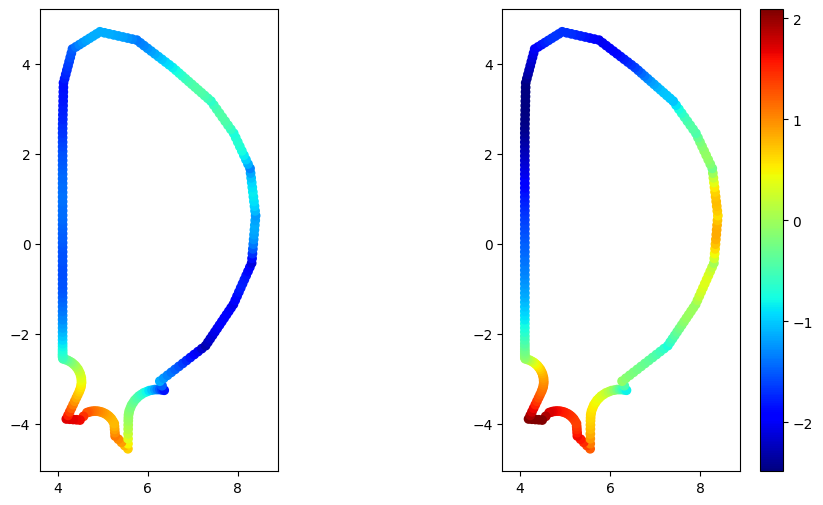

In [20]:
self = Problem

cmap = plt.get_cmap('jet')

norm = plt.Normalize(np.min([self.PSI_B_sim[0].min(),self.PSI_B_sim[1].min()]),np.max([self.PSI_B_sim[0].max(),self.PSI_B_sim[1].max()]))

fig, axs = plt.subplots(1, 2, figsize=(11,6))
axs[0].set_aspect('equal')
axs[0].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[0].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors0 = cmap(norm(self.PSI_B_sim[0]))
axs[0].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors0)

axs[1].set_aspect('equal')
axs[1].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[1].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors1 = cmap(norm(self.PSI_B_sim[1]))
axs[1].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=axs[1])


In [21]:
np.linalg.norm(np.array(self.PSI_B_sim[0])-np.array(self.PSI_B_sim[1]))

15.518178249304068